In [2]:
import math
import numpy as np 
import pandas_datareader as web
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import LSTM , Dense 
plt.style.use('fivethirtyeight')

In [3]:
df = web.DataReader('DATAMATICS.NS' , data_source = 'yahoo' , start = '2012-03-03' , end = '2019-03-03')

In [4]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-03-05,29.500000,28.200001,28.500000,29.000000,1036.0,24.755716
2012-03-06,30.299999,28.200001,30.299999,28.400000,2452.0,24.243530
2012-03-07,28.799999,27.299999,27.600000,27.700001,5316.0,23.645977
2012-03-09,30.200001,28.250000,30.200001,28.299999,4179.0,24.158167
2012-03-12,30.000000,28.250000,30.000000,29.000000,1003.0,24.755716
...,...,...,...,...,...,...
2019-02-25,94.050003,85.550003,86.949997,90.900002,187546.0,89.610641
2019-02-26,90.500000,86.650002,90.500000,87.500000,59574.0,86.258865
2019-02-27,91.800003,87.000000,88.050003,87.949997,42035.0,86.702477


<Figure size 576x1152 with 0 Axes>

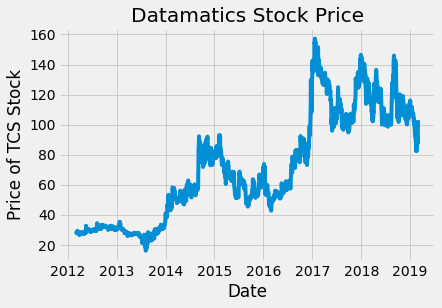

<Figure size 576x1152 with 0 Axes>

In [5]:
plt.plot(df['Close'] , label = 'Close')
plt.ylabel('Price of TCS Stock')
plt.xlabel('Date')
plt.title('Datamatics Stock Price')
plt.figure(figsize=(8,16))

In [7]:
data = df.filter(['Close'])
raw_data = data.values 


In [ ]:
training_data_len = math.ceil(len(raw_data)*.8)

In [ ]:
scaler = MinMaxScaler(feature_range= (0,1))
scaled_data = scaler.fit_transform(raw_data)

In [ ]:
len(raw_data)

1723

In [ ]:
print(training_data_len)

1379


In [ ]:
training_data = scaled_data[0 : training_data_len , :]

In [ ]:
x_train = []
y_train = []

for i in range(60 , len(training_data)):
  x_train.append(training_data[i-60:i,0])
  y_train.append(training_data[i,0 ])
  if i <= 61:
    print(x_train)
    print( )
    print(y_train)

[array([0.09139213, 0.08714133, 0.08218208, 0.08643286, 0.09139213,
       0.09387177, 0.08855827, 0.08537017, 0.08855827, 0.08430747,
       0.08430747, 0.08749558, 0.08537017, 0.08147361, 0.07757704,
       0.08218208, 0.07970244, 0.07332625, 0.0793482 , 0.08111937,
       0.08111937, 0.083599  , 0.08324478, 0.08714133, 0.08182784,
       0.08111937, 0.08076514, 0.07863975, 0.0846617 , 0.08395324,
       0.08076514, 0.08182784, 0.08501594, 0.08607864, 0.08289053,
       0.08218208, 0.08005667, 0.08076514, 0.08926674, 0.08962097,
       0.08076514, 0.08537017, 0.08537017, 0.08147361, 0.08572441,
       0.09174636, 0.0846617 , 0.08678711, 0.08643286, 0.11760539,
       0.10414452, 0.1027276 , 0.09599716, 0.10131066, 0.10591568,
       0.10520723, 0.10237335, 0.09776833, 0.09564293, 0.0963514 ])]

[0.09493446443319091]
[array([0.09139213, 0.08714133, 0.08218208, 0.08643286, 0.09139213,
       0.09387177, 0.08855827, 0.08537017, 0.08855827, 0.08430747,
       0.08430747, 0.08749558, 0.08

In [ ]:
x_train , y_train = np.array(x_train) , np.array(y_train)

In [ ]:
x_train.shape[0]

1319

In [ ]:
x_train.shape[1]

60

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1] , 1))
x_train.shape

(1319, 60, 1)

In [ ]:
#CREATE A MODEL
Model = Sequential()
Model.add(LSTM( 50 , return_sequences = True , input_shape = (x_train.shape[1] , 1) ))
Model.add(LSTM( 50 , return_sequences= False ))
Model.add(Dense(25))
Model.add(Dense(1))


In [ ]:
Model.compile(optimizer='adam' , loss = 'mean_squared_error')

In [ ]:
Model.fit(x_train , y_train , batch_size= 1 , epochs= 1)

1319/1319 [==============================] - 43s 30ms/step - loss: 0.0036


In [ ]:
test_data = scaled_data[training_data_len-60: , :]

x_test = []
y_test = raw_data[training_data_len: , : ]

for i in range(60 , len(test_data)):
  x_test.append(test_data[i-60:i , 0 ])


In [ ]:
x_test = np.array(x_test)
x_test.shape

(344, 60)

In [ ]:
x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1] , 1))

In [ ]:
predictions =  Model.predict(x_test)
prediction = scaler.inverse_transform(predictions)

In [ ]:
print(len(prediction))

344


In [ ]:
rmse = np.sqrt(np.mean(prediction-y_test)**2)

In [ ]:
rmse

3.077990265779717

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


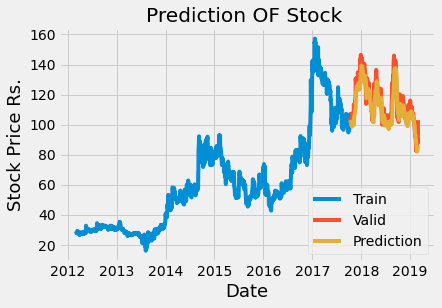

In [ ]:
train = data[: training_data_len]
valid = data[training_data_len : ]
valid['Prediction'] = prediction
plt.title('Prediction OF Stock ')
plt.xlabel('Date' , fontsize = 18)
plt.ylabel('Stock Price Rs.' , fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close' , 'Prediction']])
plt.legend(['Train' , 'Valid' , 'Prediction'] , loc = 'lower right')

In [ ]:
valid

,Close,Prediction
Date,,
2017-10-12,1274.099976,1232.879639
2017-10-13,1279.300049,1237.392212
2017-10-16,1292.199951,1243.426880
2017-10-17,1297.275024,1250.769897
2017-10-18,1293.300049,1258.497803
...,...,...
2019-02-25,1985.150024,1806.553589
2019-02-26,2038.699951,1803.326782
2019-02-27,2058.100098,1808.131958
